<a id="1"></a>
<div style="text-align:center; padding:20px 40px; color:white; margin:0; font-size:35px; font-family:Serif; display:fill; border-radius:15px; background-color:#4CAF50; box-sizing: border-box;">
    <b>🍌 Banana Leaf Disease Classification 🍃</b>
</div>

<p style="text-align:center; font-size:20px; font-family:Serif; margin-top:15px;">
    Detecting diseases in banana leaves using Artificial Intelligence 🌱🧠
</p>

<div style="display: flex; justify-content: center; gap: 20px; margin-top: 30px;">
    <div style="text-align:center;">
        <img src="https://i.postimg.cc/mZJzgWLT/62.jpg" alt="Healthy Leaf" style="border-radius:10px; border: 2px solid #4CAF50;">
        <p style="color:#4CAF50; font-size:18px;">Healthy</p>
    </div>
    <div style="text-align:center;">
        <img src="https://i.postimg.cc/4nRxbZyt/18.jpg" alt="Sigatoka Disease" style="border-radius:10px; border: 2px solid #4CAF50;">
        <p style="color:#4CAF50; font-size:18px;">Sigatoka</p>
    </div>
    <div style="text-align:center;">
        <img src="https://i.postimg.cc/m29ccpkC/12.jpg" alt="Cordana Disease" style="border-radius:10px; border: 2px solid #4CAF50;">
        <p style="color:#4CAF50; font-size:18px;">Cordana</p>
    </div>
    <div style="text-align:center;">
        <img src="https://i.postimg.cc/BZkNDv5y/1.jpg" alt="Pestalotiopsis Disease" style="border-radius:10px; border: 2px solid #4CAF50;">
        <p style="color:#4CAF50; font-size:18px;">Pestalotiopsis</p>
    </div>
</div>

<p style="text-align:center; font-size:18px; font-family:Serif; margin-top:20px;">
    <b>Models Used:</b> Transfer Learning with models for classification
</p>

<p style="text-align:center; font-size:18px; font-family:Serif; margin-bottom:20px;">
    <b>Objective:</b> Improve detection of banana leaf diseases for early intervention in agriculture 🍌🌿
</p>


---
<h2 style=text-align:center;>Importación de Bibliotecas</h2>

En esta sección, importamos las bibliotecas necesarias para desarrollar el modelo de clasificación de imágenes

In [2]:
# Bibliotecas de TensorFlow y Keras
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential

# Bibliotecas de visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Bibliotecas de procesamiento de datos y métricas
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

---

<h2 style=text-align:center;>Configuración de las Imágenes y Generadores de Datos</h2>

En esta sección, se definen los parámetros relacionados con el tamaño de las imágenes, los directorios de datos, y el preprocesamiento de imágenes antes de alimentar el modelo.

### Tamaño de las Imágenes
Para garantizar que todas las imágenes de entrada sean del mismo tamaño, se establecen las dimensiones de las imágenes que se utilizarán en el modelo:

- **img_height**: Altura de las imágenes (299 píxeles).
- **img_width**: Ancho de las imágenes (299 píxeles).

Estos valores se establecieron de acuerdo con el tamaño de entrada requerido por la arquitectura de InceptionV3.

### Tamaño del Batch
El tamaño del batch, que determina cuántas imágenes se procesan en paralelo durante el entrenamiento, se define como:

- **batch_size**: 32

### Directorios de las Imágenes
Los directorios donde se encuentran almacenadas las imágenes para entrenamiento, validación y prueba:

- **train_dir**: Directorio que contiene las imágenes de entrenamiento.
- **valid_dir**: Directorio que contiene las imágenes de validación.
- **test_dir**: Directorio que contiene las imágenes de prueba.

### Preprocesamiento de las Imágenes
Para mejorar la capacidad del modelo de generalizar, se realizan algunas técnicas de aumentación de datos y preprocesamiento de imágenes:

- **train_datagen**: El generador para el conjunto de entrenamiento aplica las siguientes transformaciones:
  - **rescale**: Normaliza los valores de los píxeles al rango [0, 1].
  - **rotation_range**: Rota las imágenes aleatoriamente hasta 20 grados.
  - **width_shift_range**: Desplaza aleatoriamente la imagen horizontalmente hasta un 20%.
  - **height_shift_range**: Desplaza aleatoriamente la imagen verticalmente hasta un 20%.
  - **shear_range**: Aplica un corte en los ejes de hasta 20%.
  - **zoom_range**: Hace zoom aleatorio en la imagen de hasta un 20%.
  - **horizontal_flip**: Invierte aleatoriamente las imágenes horizontalmente.
  - **fill_mode**: Usa el modo 'nearest' para rellenar los píxeles vacíos tras las transformaciones.

- **valid_datagen**: El generador para el conjunto de validación solo aplica una normalización con el valor de **rescale**.

### Generadores de Datos
Se crean generadores de datos que alimentarán las imágenes al modelo durante el entrenamiento y la validación:

- **train_generator**: Generador para el conjunto de entrenamiento, que toma las imágenes de `train_dir`, las transforma según las configuraciones mencionadas, y genera lotes con el tamaño definido en `batch_size`.
- **valid_generator**: Generador para el conjunto de validación, con un flujo similar al de entrenamiento pero sin aumentación de datos.

Ambos generadores definen que el tipo de clasificación es **categorical** debido a la naturaleza del problema de clasificación con múltiples clases.


In [3]:
# Tamaño de las imágenes

img_height = 299
img_width = 299

# Tamaño del batch

batch_size = 32

# Directorios de las imágenes

train_dir = '../data/train'
valid_dir = '../data/valid'
test_dir = '../data/test'

# Preprocesamiento de las imágenes

train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

valid_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 655 images belonging to 4 classes.
Found 92 images belonging to 4 classes.


---

<h2 style=text-align:center;>Visualización de Imágenes y Etiquetas de Entrenamiento</h2>

En esta sección, se obtiene un lote de imágenes y etiquetas desde el generador de datos de entrenamiento, y se visualizan algunas de ellas junto con sus etiquetas correspondientes.

d:\Universidad\6toSemeste\IA\Banana-Disease-Clasification\venv\lib\site-packages\PIL\TiffImagePlugin.py:900: UserWarning: Truncated File Read
  warnings.warn(str(msg))
d:\Universidad\6toSemeste\IA\Banana-Disease-Clasification\venv\lib\site-packages\PIL\JpegImagePlugin.py:846: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  warnings.warn(


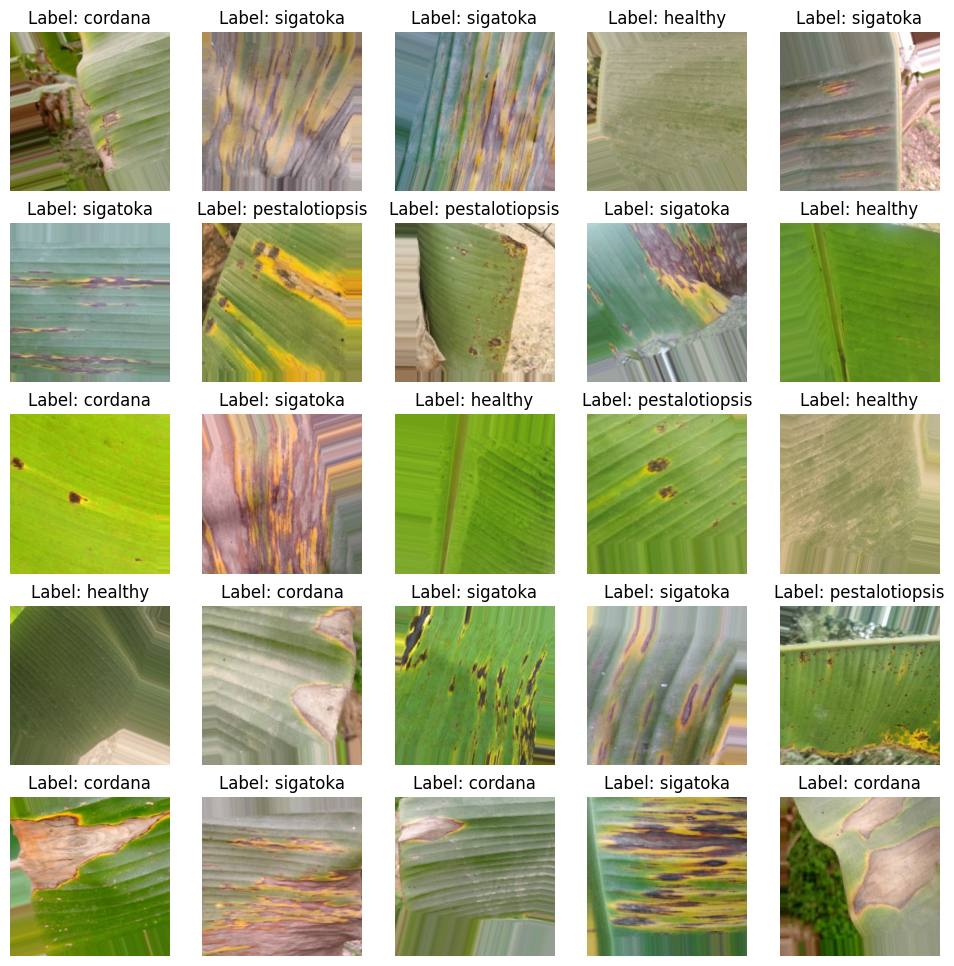

In [4]:
# Obtener un diccionario de clases (nombre -> índice)
class_labels = train_generator.class_indices

# Reiniciar el diccionario para obtener el índice de la clase
class_labels = {v: k for k, v in class_labels.items()}

# Obtener un lote de imágenes y etiquetas
images, labels = next(train_generator)

# Mostrar las imágenes y etiquetas
plt.figure(figsize=(12, 12))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(images[i])
    plt.axis('off')
    label_index = labels[i].argmax()  
    plt.title(f'Label: {class_labels[label_index]}')
plt.show()

---

<h2 style=text-align:center;>Cargar el Modelo Base InceptionV3</h2>

En esta sección, se carga el modelo base **InceptionV3**, que se utilizará como parte del enfoque de **transfer learning** para la clasificación de imágenes.

### Modelo Base: InceptionV3
**InceptionV3** es una arquitectura de red neuronal profunda que ha sido preentrenada en el dataset **ImageNet**. Este modelo ha aprendido a reconocer una amplia variedad de objetos y patrones en imágenes, lo que lo convierte en una base poderosa para aplicar transfer learning a nuestro problema específico.

### Parámetros del Modelo Base:
- **weights='imagenet'**: Se especifica que se cargarán los pesos preentrenados del modelo, que se han optimizado utilizando el dataset ImageNet.
- **include_top=False**: Esto excluye las capas totalmente conectadas de la parte superior del modelo (la capa de clasificación final). Esta opción es importante, ya que queremos adaptar las capas superiores del modelo a nuestro problema de clasificación de enfermedades en hojas de banana.
- **input_shape=(img_height, img_width, 3)**: Se define el tamaño de las imágenes de entrada que utilizará el modelo, en este caso, de dimensiones **299x299** píxeles con 3 canales (imágenes a color).

Al cargar este modelo, se reutilizan las características aprendidas por **InceptionV3**, permitiendo ajustar las capas superiores para la clasificación de nuestro conjunto de imágenes específico.


In [5]:
# Cargar el modelo base InceptionV3

base_model_inception = InceptionV3(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))


---

<h2 style=text-align:center;>Construcción del Modelo Secuencial con InceptionV3</h2>

En esta sección, se construye el modelo secuencial utilizando la arquitectura **InceptionV3** preentrenada como base, seguida por capas adicionales que se entrenarán para realizar la tarea específica de clasificación de enfermedades en hojas de banana.

### Modelo Secuencial
Se crea un modelo secuencial que sigue la arquitectura en capas, añadiendo las siguientes capas:

1. **base_model_inception**: Se utiliza el modelo base **InceptionV3** que fue cargado previamente, con los pesos preentrenados en ImageNet. El modelo está configurado para no incluir la capa superior de clasificación (`include_top=False`), lo que nos permite personalizar la salida.
   
2. **GlobalAveragePooling2D**: Esta capa realiza un promedio global sobre las características espaciales de las imágenes, reduciendo así la dimensionalidad de los datos de salida del modelo base. Esto es útil para preparar los datos antes de alimentar las capas densas.
   
3. **Dense(128, activation='relu')**: Se añade una capa densa con 128 neuronas y la función de activación **ReLU**, que introduce no linealidad en el modelo y permite que aprenda representaciones complejas de los datos.
   
4. **BatchNormalization()**: La normalización por lotes ayuda a estabilizar y acelerar el entrenamiento del modelo, ajustando y escalando las activaciones de la capa anterior.
   
5. **Dropout(0.5)**: Se emplea la técnica de Dropout con una tasa de desactivación del 50%, lo que ayuda a prevenir el sobreajuste durante el entrenamiento al desactivar aleatoriamente el 50% de las neuronas en esta capa.

6. **Dense(train_generator.num_classes, activation='softmax')**: La capa final es una capa densa con tantas neuronas como clases haya en el conjunto de datos (determinadas por `train_generator.num_classes`), utilizando la función de activación **softmax** para realizar la clasificación multiclase.

### Congelación del Modelo Base
Después de definir el modelo secuencial, se establece que las capas del modelo base **InceptionV3** no serán entrenables:

- **base_model_inception.trainable = False**: Esto indica que las capas preentrenadas no se actualizarán durante el entrenamiento, lo que significa que solo las capas superiores (que agregamos) serán entrenadas para el conjunto de datos específico.


In [6]:
model_inception = Sequential([
    base_model_inception,
    GlobalAveragePooling2D(),
    
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    
    Dense(train_generator.num_classes, activation='softmax')
])


base_model_inception.trainable = False

---

<h2 style=text-align:center;>Compilación y Resumen del Modelo</h2>

En esta sección, se realiza la compilación del modelo y se muestra su arquitectura con un resumen detallado de las capas, las dimensiones de salida y la cantidad de parámetros entrenables y no entrenables.

## Compilación del Modelo
Se compila el modelo utilizando el optimizador **Adam** y la función de pérdida **categorical_crossentropy**, que es adecuada para problemas de clasificación multiclase. El modelo se configurará para medir la precisión durante el entrenamiento.

- **optimizer='adam'**: Se utiliza el optimizador Adam, que es una versión mejorada del optimizador de descenso por gradiente estocástico (SGD), que adapta el learning rate durante el entrenamiento.
- **loss='categorical_crossentropy'**: Dado que se trata de un problema de clasificación multiclase (4 clases en este caso), se utiliza la función de pérdida de entropía cruzada categórica.
- **metrics=['accuracy']**: Se utiliza la precisión (**accuracy**) como métrica para evaluar el rendimiento del modelo durante el entrenamiento y la validación.

In [7]:
model_inception.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_inception.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inception_v3 (Functional)       │ (None, 8, 8, 2048)     │    21,802,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_94          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,066,084 (84.18 MB)

 Trainable params: 263,044 (1.00 MB)

 Non-trainable params: 21,803,040 (83.17 MB)

---

<h2 style=text-align:center;> Resumen del Modelo </h2>
El resumen del modelo muestra la arquitectura del mismo:

1. **inception_v3**: La primera capa es el modelo preentrenado InceptionV3, cuya salida tiene una forma de `(None, 8, 8, 2048)` y contiene más de 21 millones de parámetros no entrenables.
   
2. **global_average_pooling2d**: Reduce la dimensionalidad de las características espaciales a `(None, 2048)`.

3. **dense**: La primera capa densa tiene 128 neuronas, con un total de 262,272 parámetros entrenables.

4. **batch_normalization**: Normaliza las activaciones a lo largo de las 128 dimensiones.

5. **dropout**: Se aplica Dropout con una tasa de 50% para evitar el sobreajuste.

6. **dense**: La última capa densa tiene 4 neuronas con activación softmax, que proporciona una salida categórica con las probabilidades de las 4 clases.

### Parámetros del Modelo
- **Total params**: 22,066,084 parámetros en total, lo que indica el tamaño completo del modelo.
- **Trainable params**: 263,044 parámetros son entrenables, lo que corresponde a las capas añadidas después del modelo base InceptionV3.
- **Non-trainable params**: 21,803,040 parámetros no son entrenables, ya que pertenecen al modelo base que se ha congelado.

Este resumen proporciona una vista clara de la arquitectura y permite verificar la cantidad de parámetros involucrados en el proceso de entrenamiento.

---

<h2 style=text-align:center;>Entrenamiento del Modelo</h2>

En esta sección, se entrena el modelo utilizando el método `fit()`, que ajusta los pesos del modelo a los datos de entrenamiento.

### Parámetros del Entrenamiento:
- **train_generator**: Este generador proporciona los datos de entrenamiento previamente procesados y aumentados. Las imágenes se generan en lotes para ahorrar memoria.
- **steps_per_epoch**: Define el número de pasos por época en función del número total de muestras dividido por el tamaño del batch. Esto determina cuántos lotes de imágenes se procesarán en cada época.
- **validation_data**: Se utiliza el generador de validación para evaluar el rendimiento del modelo en los datos de validación después de cada época.
- **validation_steps**: Similar a `steps_per_epoch`, indica el número de pasos por cada iteración de validación.
- **epochs=50**: El modelo se entrenará durante 50 épocas completas, lo que implica que el modelo verá el conjunto de entrenamiento 50 veces.
- **verbose=1**: Indica que se mostrará la salida detallada del progreso del entrenamiento en cada época.

### Proceso de Entrenamiento:
Durante el entrenamiento, el modelo ajusta sus parámetros a las imágenes de entrenamiento y calcula el rendimiento en los datos de validación después de cada época. El objeto `history_inception` almacenará el historial del entrenamiento, incluyendo métricas como la precisión y la pérdida tanto en el conjunto de entrenamiento como en el conjunto de validación.

In [8]:
history_inception = model_inception.fit(
    train_generator, 
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=valid_generator,
    validation_steps=valid_generator.samples // batch_size,
    epochs=50,
    verbose=1)

d:\Universidad\6toSemeste\IA\Banana-Disease-Clasification\venv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 68s 3s/step - accuracy: 0.5318 - loss: 1.3083 - val_accuracy: 0.4062 - val_loss: 1.5133
Epoch 2/50
 1/20 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.7500 - loss: 0.4991

C:\Python\Python310\lib\contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 146ms/step - accuracy: 0.7500 - loss: 0.4991 - val_accuracy: 0.3214 - val_loss: 1.5814
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 55s 3s/step - accuracy: 0.8338 - loss: 0.4485 - val_accuracy: 0.8438 - val_loss: 0.5046
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 149ms/step - accuracy: 0.7500 - loss: 0.5283 - val_accuracy: 0.7500 - val_loss: 0.7935
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 54s 3s/step - accuracy: 0.8879 - loss: 0.3039 - val_accuracy: 0.8125 - val_loss: 0.4892
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 118ms/step - accuracy: 0.8750 - loss: 0.2656 - val_accuracy: 0.8571 - val_loss: 0.5951
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 58s 3s/step - accuracy: 0.9148 - loss: 0.2684 - val_accuracy: 0.9375 - val_loss: 0.2954
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 104ms/step - accuracy: 0.9688 - loss: 0.2610 - val_accuracy: 0.9643 - val_loss: 0.1843
Epoch 9/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 53s 3s/step - accuracy: 0.9245 - loss: 0.2303 - val_accuracy: 0.8750 - val_loss: 0.

---
<h2 style=text-align:center;>Evaluación del Modelo</h2>

En esta sección, se evalúa el rendimiento del modelo entrenado utilizando el conjunto de datos de validación.

In [9]:
val_loss, val_accuracy = model_inception.evaluate(valid_generator)
print(f"Validation accuracy: {val_accuracy:.2f}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.9603 - loss: 0.1653
Validation accuracy: 0.97


In [14]:
val_loss, val_accuracy = model_inception.evaluate(valid_generator, steps=valid_generator.samples // batch_size)
print(f'Precisión en el conjunto de validación: {val_accuracy*100:.2f}%')

2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.9583 - loss: 0.1872
Precisión en el conjunto de validación: 96.88%


- Precisión en validación (Validation accuracy): 0.97, lo que indica un 97% de precisión en el conjunto de validación.
- Pérdida en validación (Validation loss): 0.1653, sugiere que el modelo tiene un buen ajuste sin un exceso de sobreajuste.

---
<h2 style=text-align:center;>Matriz de Confusión</h2>

La siguiente figura muestra la matriz de confusión obtenida después de evaluar el modelo de clasificación de imágenes de enfermedades en hojas de banana. La matriz refleja las predicciones realizadas por el modelo en comparación con las etiquetas verdaderas.

Found 190 images belonging to 4 classes.


d:\Universidad\6toSemeste\IA\Banana-Disease-Clasification\venv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2/6 ━━━━━━━━━━━━━━━━━━━━ 16s 4s/step

d:\Universidad\6toSemeste\IA\Banana-Disease-Clasification\venv\lib\site-packages\PIL\TiffImagePlugin.py:900: UserWarning: Truncated File Read
  warnings.warn(str(msg))
d:\Universidad\6toSemeste\IA\Banana-Disease-Clasification\venv\lib\site-packages\PIL\JpegImagePlugin.py:846: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  warnings.warn(


6/6 ━━━━━━━━━━━━━━━━━━━━ 23s 4s/step


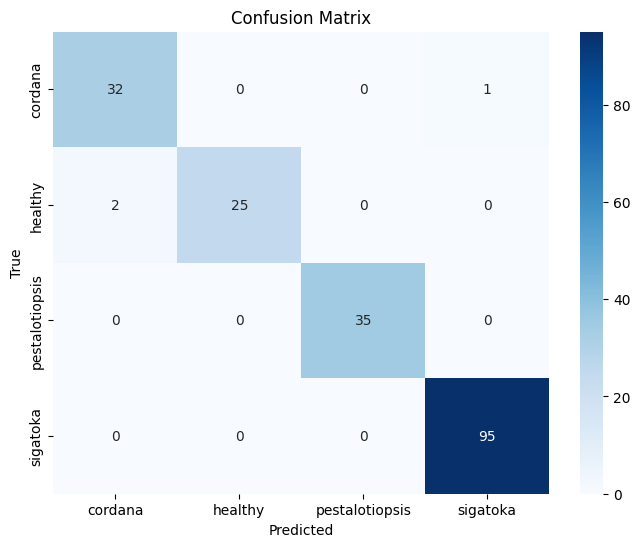

Reporte de Clasificación:
                precision    recall  f1-score   support

       cordana       0.94      0.97      0.96        33
       healthy       1.00      0.93      0.96        27
pestalotiopsis       1.00      1.00      1.00        35
      sigatoka       0.99      1.00      0.99        95

      accuracy                           0.98       190
     macro avg       0.98      0.97      0.98       190
  weighted avg       0.98      0.98      0.98       190



In [11]:
# Ruta a tus datos
test_dir = '../data/test'

# Preprocesamiento del conjunto de prueba
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Importante para obtener las etiquetas en el mismo orden
)

# Obtener las predicciones del modelo
predictions = model_inception.predict(test_generator)
y_pred = np.argmax(predictions, axis=1)

# Obtener las etiquetas verdaderas
y_true = test_generator.classes

# Obtener los nombres de las clases
class_labels = list(test_generator.class_indices.keys())

# Crear la matriz de confusión
conf_matrix = confusion_matrix(y_true, y_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Generar el reporte de clasificación con precisión, recall, F1-score, etc.
class_report = classification_report(y_true, y_pred, target_names=class_labels)  # Cambiado aquí
print("Reporte de Clasificación:")
print(class_report)


### Clases:
- **cordana**: Enfermedad Cordana
- **healthy**: Hojas sanas
- **pestalotiopsis**: Enfermedad Pestalotiopsis
- **sigatoka**: Enfermedad Sigatoka

### Análisis de Resultados:

- **Clase Cordana**: 
  - 32 imágenes fueron correctamente clasificadas como **Cordana**.
  - 1 imagen de **Cordana** fue incorrectamente clasificada como **Sigakota**.

- **Clase Healthy (Saludable)**:
  - 25 imágenes fueron correctamente clasificadas como **Healthy**.
  - 2 imagenes de **Healthyt** fueron incorrectamente clasificadas como **Cordana**. .

- **Clase Pestalotiopsis**:
  - 35 imágenes fueron correctamente clasificadas como **Pestalotiopsis**.

- **Clase Sigatoka**:
  - 95 imágenes fueron correctamente clasificadas como **Sigatoka**.

### Conclusión:
El modelo presenta un buen rendimiento general, especialmente en las clases **Cordana** y **Sigatoka**, donde las tasas de acierto son muy altas.

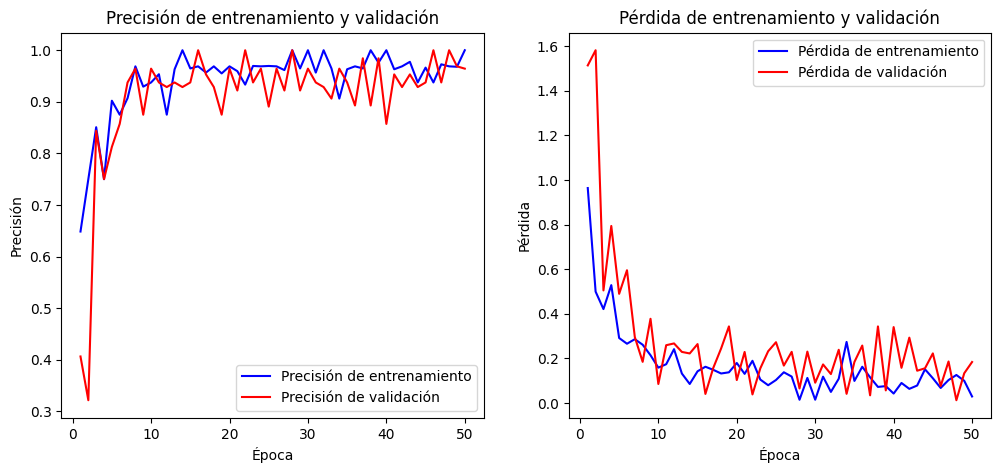

In [12]:
# Graficar las curvas de entrenamiento
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, min(len(acc), len(val_acc), len(loss), len(val_loss)) + 1)

    plt.figure(figsize=(12, 5))

    # Precisión
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc[:len(epochs)], 'b-', label='Precisión de entrenamiento')
    plt.plot(epochs, val_acc[:len(epochs)], 'r-', label='Precisión de validación')
    plt.title('Precisión de entrenamiento y validación')
    plt.xlabel('Época')
    plt.ylabel('Precisión')
    plt.legend()

    # Pérdida
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss[:len(epochs)], 'b-', label='Pérdida de entrenamiento')
    plt.plot(epochs, val_loss[:len(epochs)], 'r-', label='Pérdida de validación')
    plt.title('Pérdida de entrenamiento y validación')
    plt.xlabel('Época')
    plt.ylabel('Pérdida')
    plt.legend()

    plt.show()

plot_history(history_inception)